In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

In [2]:
df = pd.read_csv('C:\\Users\\STEVEN\\Documents\\Thinkful\\Files\\Olympics\\athlete_events.csv')
region = pd.read_csv('C:\\Users\\STEVEN\\Documents\\Thinkful\\Files\\Olympics\\noc_regions.csv')

Let's define our variables.  
Our outcome variable will be getting gold medals. 

Our two categorical variables will be sex and country,  Our three continuous will be age, year and weight

In [3]:
df.head(1)
#print(df.Team)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


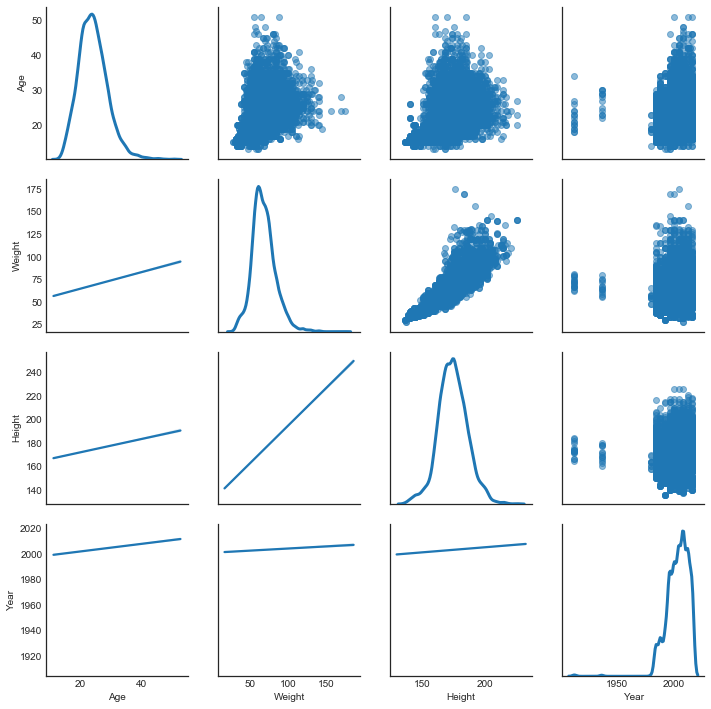

In [4]:
df_ChRu = df.loc[
        ((df['Team'] == 'China') | (df['Team'] == 'Russia')), 
        ['Team', 'Sex', 'Age', 'Weight', 'Height', 'Year']
]

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_ChRu.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

             Age    Weight    Height      Year
Age     1.000000  0.282073  0.228069 -0.006583
Weight  0.282073  1.000000  0.835411  0.049970
Height  0.228069  0.835411  1.000000  0.093031
Year   -0.006583  0.049970  0.093031  1.000000


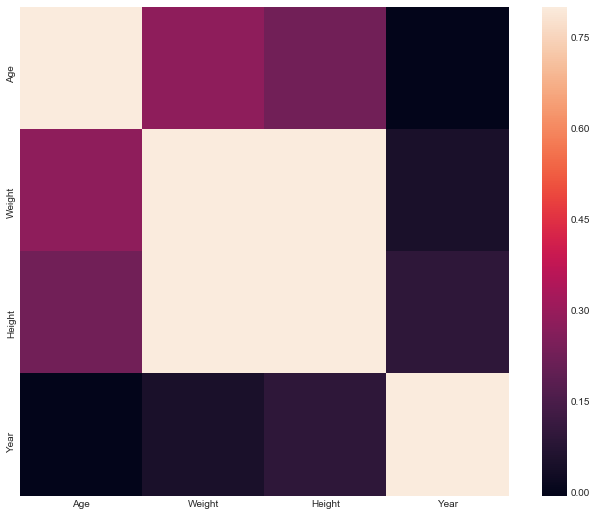

In [5]:
corrmat = df_ChRu.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


c:\users\steven\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


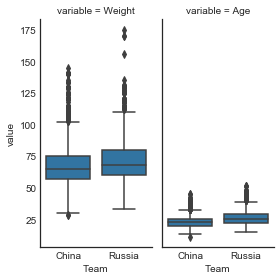

In [6]:
# for each variable separately.
df_long = df_ChRu[['Team', 'Weight', 'Age']]
df_long = pd.melt(df_long, id_vars=['Team'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "Team", "value")
plt.show()


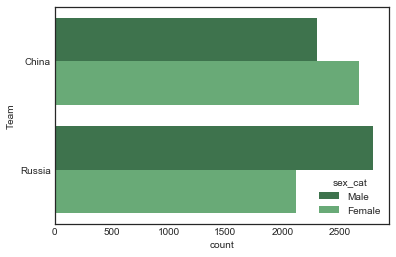

sex_cat  Female  Male
Team                 
China      2673  2302
Russia     2122  2800
Power_divergenceResult(statistic=120.99211882388605, pvalue=4.7180201550347615e-26)


In [7]:
# Add a second categorical variable.
df_sex = df.loc[
    ((df['Team'] == 'China') | (df['Team'] == 'Russia')),
    ['Team','Sex']
]

df_sex['sex_cat'] = None
df_sex.loc[df_sex['Sex'] == "M", 'sex_cat'] = 'Male'
df_sex.loc[df_sex['Sex'] == 'F', 'sex_cat'] = 'Female'

# Plot counts for each combination of levels.
sns.countplot(y="Team", hue="sex_cat", data=df_sex, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_sex['Team'], df_sex['sex_cat'])
print(counttable)
#Chisquare
print(stats.chisquare(counttable, axis=None))

In [8]:
# Now that we have created a few models to better show our data 
#let's begin creating a few features.  



In [9]:
features = pd.get_dummies(df['Team'])

features['NA'] = np.where((df['Team'].isin(['United States', 'Mexico', 'Canada'])), 1, 0)

#print(pd.crosstab(features['NA'], df['Team']))

features['commies'] = np.where((df['Team'].isin(['Russia', 'China', 'North Korea'])), 1, 0)

features['axis'] = np.where((df['Team'].isin(['Germany', 'Japan', 'Italy'])), 1, 0)

features['island'] = np.where((df['Team'].isin(['New Zealand', 'Australia'])), 1, 0)

features['SA'] =np.where((df['Team'].isin(['Argentina', 'Brazil', 'Paraguay', 'Uruguay', 'Colombia', 'Peru', 'Chile'])), 1, 0)

In [10]:
#old athletes

features['Adult_35plus'] = np.where(df['Age']>=35, 1, 0)

print(df['Age'].groupby(features['Adult_35plus']).describe())

print(df[df['Age'] == 97])

                 count       mean       std   min   25%   50%   75%   max
Adult_35plus                                                             
0             242125.0  24.293117  4.326923  10.0  21.0  24.0  27.0  34.0
1              19517.0  41.235180  7.079036  35.0  36.0  39.0  44.0  97.0
            ID                    Name Sex   Age  Height  Weight  \
257054  128719  John Quincy Adams Ward   M  97.0     NaN     NaN   

                 Team  NOC        Games  Year  Season       City  \
257054  United States  USA  1928 Summer  1928  Summer  Amsterdam   

                   Sport                                        Event Medal  
257054  Art Competitions  Art Competitions Mixed Sculpturing, Statues   NaN  


In [11]:
#Sex
features['female'] = np.where(df['Sex']=='F', 1, 0)

print(df['Sex'].groupby(features['female']).describe())

         count unique top    freq
female                           
0       196594      1   M  196594
1        74522      1   F   74522


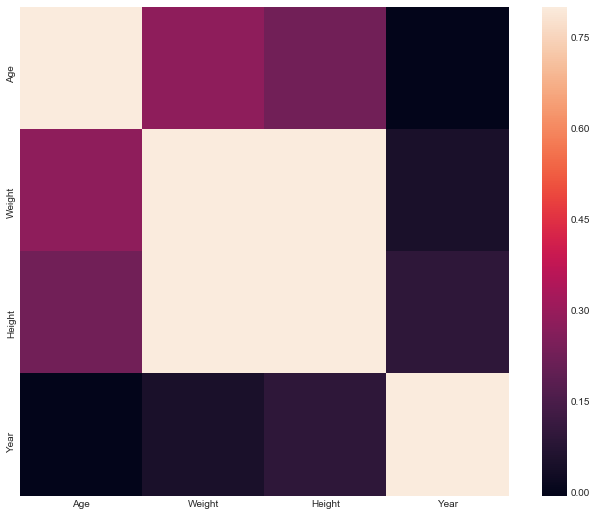

           Height    Weight   hei_wei
Height   1.000000  0.796213  0.948674
Weight   0.796213  1.000000  0.947989
hei_wei  0.948674  0.947989  1.000000


In [12]:
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

means = df[['Height','Weight']].mean(axis=0)
stds = df[['Height','Weight']].std(axis=0)
features['hei_wei'] = ((df[['Height', 'Weight']] - means) / stds).mean(axis=1)

plotdf = df.loc[:, ['Height', 'Weight']]
plotdf['hei_wei'] = features['hei_wei'] 
corrmat2 = plotdf.corr()
print(corrmat2)

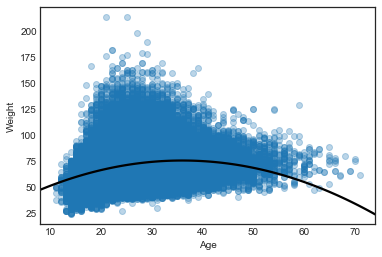

In [13]:
sns.regplot(
    df['Age'],
    y=df['Weight'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['age_squared'] = df['Age'] * df['Age']
features['age_sqrt'] =df['Age'] ** 1.5


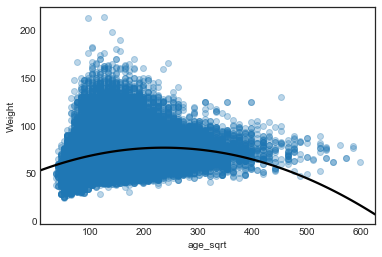

In [14]:
sns.regplot(
    features['age_sqrt'],
    y=df['Weight'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()


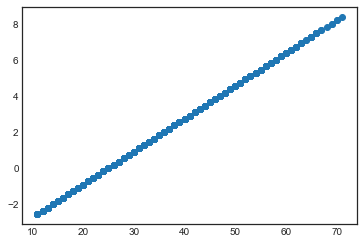

                 ID           Age        Height        Weight          Year
count  2.061650e+05  2.061650e+05  2.061650e+05  2.061650e+05  2.061650e+05
mean   7.720106e-17  2.760972e-16 -1.351019e-16 -1.516449e-17  4.591809e-15
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00
min   -1.759521e+00 -2.563432e+00 -4.586731e+00 -3.186009e+00 -4.653297e+00
25%   -8.570535e-01 -7.396403e-01 -6.990239e-01 -7.453355e-01 -6.792908e-01
50%    3.329107e-04 -1.925028e-01 -3.526905e-02 -4.800017e-02  1.155106e-01
75%    8.641045e-01  5.370138e-01  7.233079e-01  5.796016e-01  8.109617e-01
max    1.716952e+00  8.379318e+00  4.800659e+00  9.993629e+00  1.307713e+00


In [15]:
from sklearn import preprocessing

df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['Age'], df_scaled['Age'])
plt.show()
print(df_scaled.describe())

In [16]:
print(features.head(1))

   30. Februar  A North American Team  Acipactli  Acturus  Afghanistan  \
0            0                      0          0        0            0   

   Akatonbo  Alain IV  Albania  Alcaid  Alcyon-6     ...      NA  commies  \
0         0         0        0       0         0     ...       0        1   

   axis  island  SA  Adult_35plus  female   hei_wei  age_squared    age_sqrt  
0     0       0   0             0       0  0.545567        576.0  117.575508  

[1 rows x 1194 columns]


In [17]:
#create gold medal count and run correlation and then proceed.

In [18]:
features['Gold'] = np.where((df['Medal'].isin(['Gold'])), 1, 0)

In [21]:
filt_feat = features[['NA', 'commies', 'SA', 'axis', 'island', 'Adult_35plus', 'female', 'hei_wei', 'age_squared', 'age_sqrt', 'Gold']]
filt_feat.corr()

,NA,commies,SA,axis,island,Adult_35plus,female,hei_wei,age_squared,age_sqrt,Gold
NA,1.000000,-0.071449,-0.069720,-0.119371,-0.068435,0.012677,0.032890,0.012143,0.005702,0.001460,0.078599
commies,-0.071449,1.000000,-0.040063,-0.068593,-0.039324,-0.033411,0.095257,-0.044422,-0.046401,-0.047959,0.014235
SA,-0.069720,-0.040063,1.000000,-0.066933,-0.038373,0.006654,-0.016355,0.013346,-0.003024,-0.003202,-0.024088
axis,-0.119371,-0.068593,-0.066933,1.000000,-0.065699,-0.004964,0.013056,-0.058896,0.002581,0.004714,0.004831
island,-0.068435,-0.039324,-0.038373,-0.065699,1.000000,-0.007358,0.034278,0.033734,-0.014878,-0.015266,-0.005317
Adult_35plus,0.012677,-0.033411,0.006654,-0.004964,-0.007358,1.000000,-0.079645,0.035420,0.733298,0.722272,-0.000568
female,0.032890,0.095257,-0.016355,0.013056,0.034278,-0.079645,1.000000,-0.524418,-0.149372,-0.164793,0.002725
hei_wei,0.012143,-0.044422,0.013346,-0.058896,0.033734,0.035420,-0.524418,1.000000,0.148407,0.165565,0.058136
age_squared,0.005702,-0.046401,-0.003024,0.002581,-0.014878,0.733298,-0.149372,0.148407,1.000000,0.993002,0.006517
age_sqrt,0.001460,-0.047959,-0.003202,0.004714,-0.015266,0.722272,-0.164793,0.165565,0.993002,1.000000,0.009517


In [ ]:
#from this simple correlation matrixs we can see what is most closely correlated to winning a gold medal 
#for our five features we will just NA countries, commies, female, a combination of height and weight,
#and the square root of age
